Question: Does it make sense to have a longer transmitter outside of the measuring location just to increase the transmitter moment?

We consider a drone EM case with flight distances of about 1km in x direction. 

Default case is a 1km long transmitter in y direction (symmetric around Rx line) that could be prolonged by another km into one direction.

In [2]:
import numpy as np
from saem import CSEMData

In [5]:
x = np.array([50, 100, 200, 400, 800])
y = np.zeros_like(x)
f = 2**(np.arange(11)) * 32
print(f)

[   32    64   128   256   512  1024  2048  4096  8192 16384 32768]


c:\Program Files\software\Anaconda\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Program Files\software\Anaconda\envs\py38\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


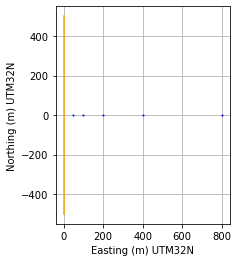

In [10]:
short = CSEMData(f=f, rx=x, ry=y, txPos=[[0, 0], [-500, 500]])
short.alt = np.ones_like(x) * 30
short.showPos();

c:\Program Files\software\Anaconda\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Program Files\software\Anaconda\envs\py38\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


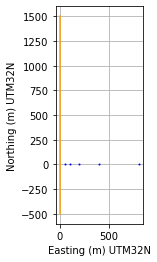

In [11]:
long = CSEMData(f=f, rx=x, ry=y, txPos=[[0, 0], [-500, 1500]])
long.alt = np.ones_like(x) * 30
long.showPos();

In [12]:
rho = [300, 30]
thk = [70]
short.simulate(rho=rho, thk=thk)
long.simulate(rho=rho, thk=thk)

In [13]:
short.DATA = short.RESP
long.DATA = long.RESP

(11, 5)
(11, 5)
(11, 5)


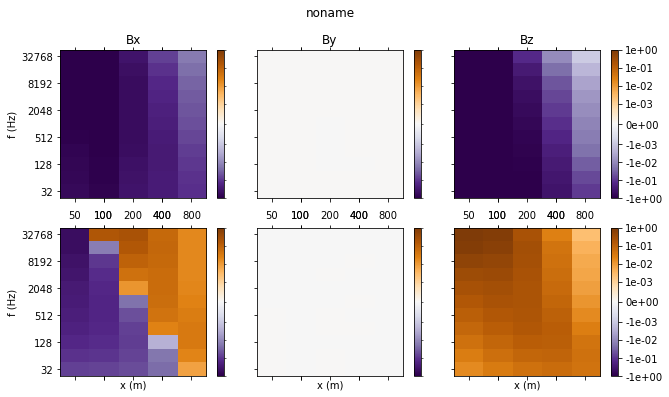

In [16]:
short.showLineData(1, alim=[1e-3, 1]);

(11, 5)
(11, 5)
(11, 5)


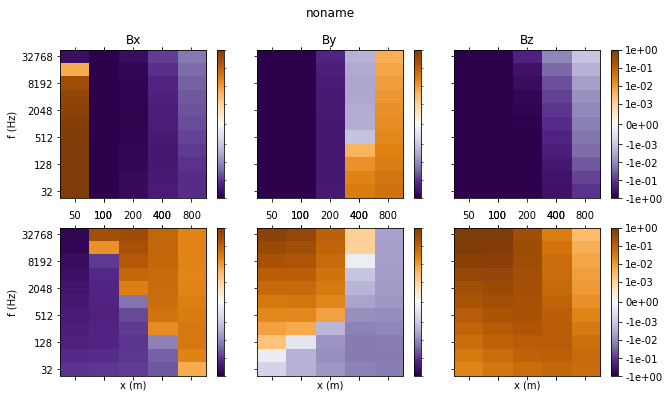

In [17]:
long.showLineData(1, alim=[1e-3, 1]);

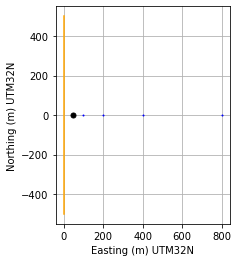

In [18]:
short.setPos(0, show=True)

In [21]:
nx = 3
print(x[nx])

400


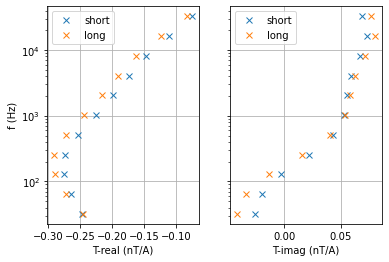

In [22]:
ax = short.showSounding(nx, amphi=False, cmp=[1, 0, 0], label="short", color="C0")
long.showSounding(nx, amphi=False, cmp=[1, 0, 0], label="long", color="C1", ax=ax);

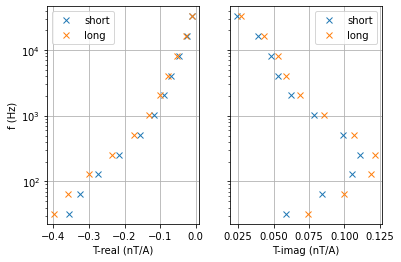

In [23]:
ax = short.showSounding(nx, amphi=False, cmp=[0, 0, 1], label="short", color="C0")
long.showSounding(nx, amphi=False, cmp=[0, 0, 1], label="long", color="C1", ax=ax);